# YOUR PROJECT TITLE

Imports and set magics:

In [14]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import optimize

# plotting
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# local modules
from modelproject import OLGModelClass
from modelproject import find_s_bracket, calc_euler_error, simulate_before_s, simulate_after_s, plot_K

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

We are very inspired by the OLG from the lectures. We want to expand with: 
- Population growth  
- Technological growth 



# Numerical solution

We start by running the code as in the lecture to make sure it runs. 

In [16]:
model = OLGModelClass()
par = model.par # SimpeNamespace
sim = model.sim # SimpeNamespace

# a. production
par.production_function = 'cobb-douglas'
par.theta = 0.0

# b. households
par.sigma = 1.0

# c. government
par.tau_w = 0.0
par.tau_r = 0.0
sim.balanced_budget[:] = True # G changes to achieve this

# # d. initial values (analytical guess)
# K_ss = ((1-par.alpha)/((1+1.0/par.beta)))**(1/(1-par.alpha))
# par.K_lag_ini = 0.1*K_ss

# # e. guess in s 
# s_g = 0.41

# # f. initialize 
# sim.K_lag[0] = par.K_lag_ini
# sim.B_lag[0] = par.B_lag_ini

# # g. simulate 
# simulate_before_s(par,sim, t=0)
# simulate_after_s(par,sim, s=s_g, t=0)
# simulate_before_s(par,sim, t=1)


# s_min, s_max = find_s_bracket(par,sim,t=0)

# obj = lambda s: calc_euler_error(s,par,sim,t=0)
# result = optimize.root_scalar(obj,bracket=(s_min,s_max),method='bisect')


model.simulate()


simulation done in 0.15 secs


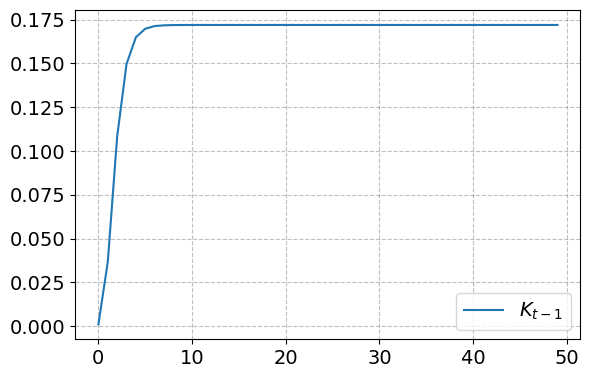

In [17]:
# a. plot the model with 'plot_K' function
plot_K(model.sim.K_lag)

# b. save old K_lag due to comparision 
K_lag_old = model.sim.K_lag.copy()

# Further analysis

## Population

We add population growth, such $N_t = 1 + n$. 

Labor maket still clears: $L_t = N_t = 1 + n$

In [22]:
model1 = OLGModelClass()
par = model1.par # SimpeNamespace
sim = model1.sim # SimpeNamespace

# a. production
par.production_function = 'cobb-douglas'
par.theta = 0.0

# b. households
par.sigma = 1.0

# c. government
par.tau_w = 0.0
par.tau_r = 0.0
sim.balanced_budget[:] = True # G changes to achieve this

# d. population growth
par.n = 0.1

model.simulate(pop = True)

simulation done in 0.04 secs


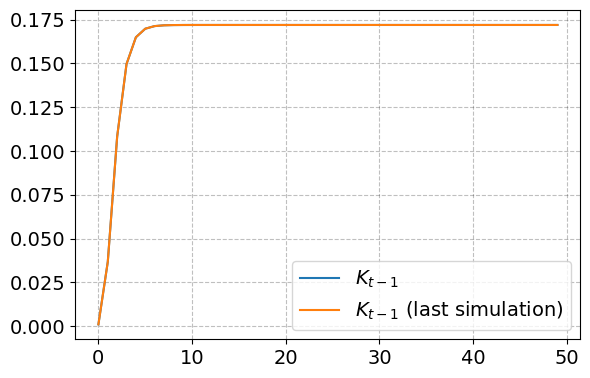

In [23]:
plot_K(K_lag = model.sim.K_lag, K_lag_old = K_lag_old)

K_lag_pop = model1.sim.K_lag

## Technical growth 

We further add technical growth, such the production function is: 

$$ Y_t = F(K_{t-1}, AL_t)$$



In [ ]:
model2 = OLGModelClass()
par = model2.par # SimpeNamespace
sim = model2.sim # SimpeNamespace

# a. production
par.production_function = 'cobb-douglas'
par.theta = 0.0

# b. households
par.sigma = 1.0

# c. government
par.tau_w = 0.0
par.tau_r = 0.0
sim.balanced_budget[:] = True # G changes to achieve this

# d. population growth
par.n = 0.1
par.n = 1.1

# e. initial values
K_ss = ((1-par.alpha)/((1+1.0/par.beta)))**(1/(1-par.alpha))
par.K_lag_ini = 0.1*K_ss


s_g = 0.41

# a. initialize
sim.K_lag[0] = par.K_lag_ini
sim.B_lag[0] = par.B_lag_ini

simulate_before_s(par,sim, t=0, pop = True, At = True)
simulate_after_s(par,sim, s=s_g, t=0, pop = True, At = True)
simulate_before_s(par,sim, t=1, pop = True, At = True)

s_min,s_max = find_s_bracket(par,sim,t=0)

obj = lambda s: calc_euler_error(s,par,sim,t=0)
result = optimize.root_scalar(obj,bracket=(s_min,s_max),method='bisect')

model1.simulate()


initializing the model:
calling .setup()
calling .allocate()
simulation done in 0.04 secs


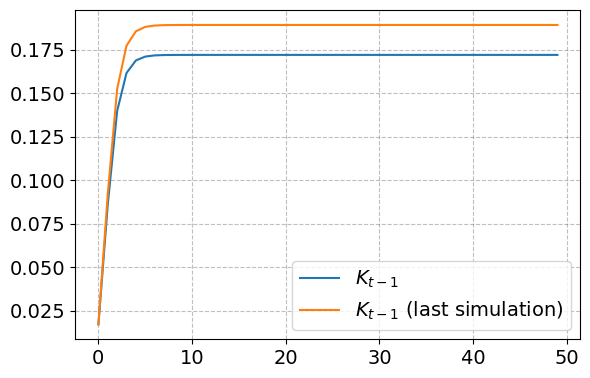

In [ ]:
plot_K(K_lag = model.sim.K_lag, K_ss = K_ss, K_lag_old = K_lag_pop)

# Conclusion

Add concise conclusion. 